In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score


In [3]:
ca=pd.read_csv("/content/ford.csv")
ca.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [4]:
ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [6]:
ca.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [8]:
ca.describe().T

,count,mean,std,min,25%,50%,75%,max
year,17966.0,2016.866470,2.050336,1996.0,2016.0,2017.0,2018.0,2060.0
price,17966.0,12279.534844,4741.343657,495.0,8999.0,11291.0,15299.0,54995.0
mileage,17966.0,23362.608761,19472.054349,1.0,9987.0,18242.5,31060.0,177644.0
tax,17966.0,113.329456,62.012456,0.0,30.0,145.0,145.0,580.0
mpg,17966.0,57.906980,10.125696,20.8,52.3,58.9,65.7,201.8
engineSize,17966.0,1.350807,0.432367,0.0,1.0,1.2,1.5,5.0


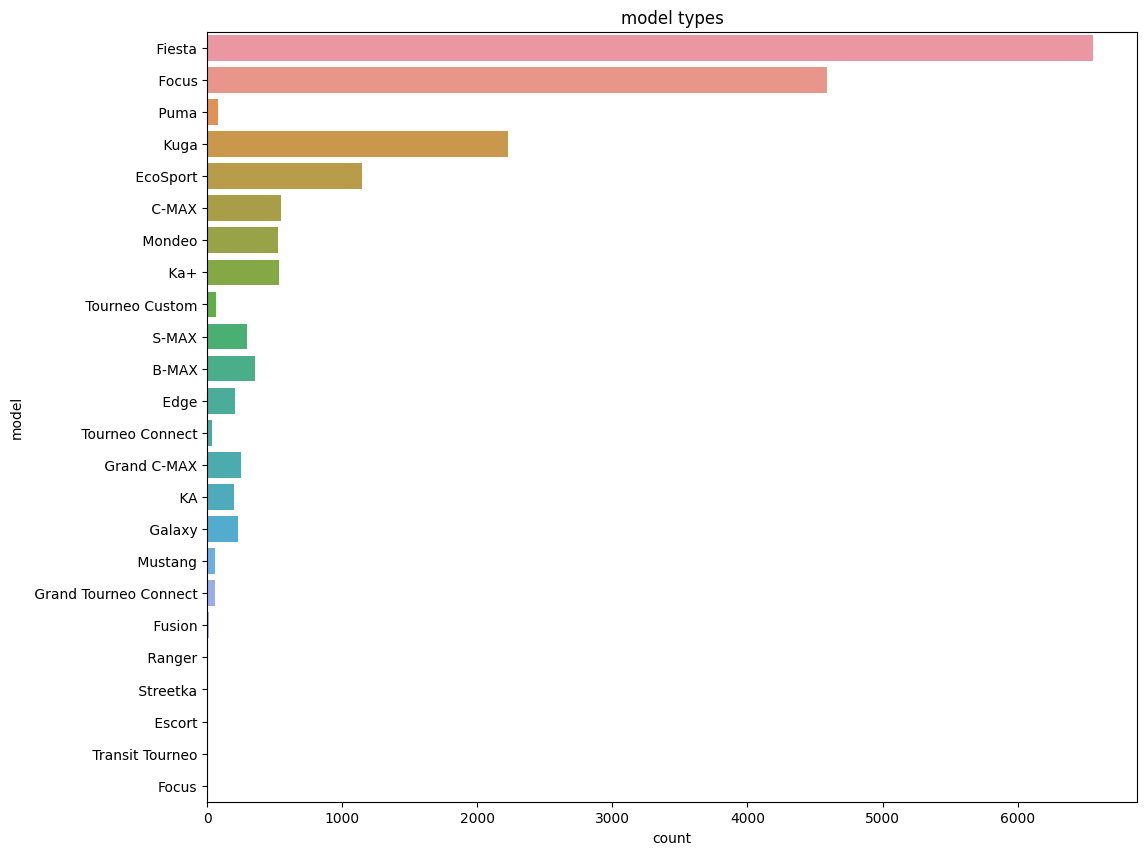

In [9]:
plt.figure(figsize=(12,10))
sns.countplot(y="model",data=ca)
plt.title("model types")
plt.show()

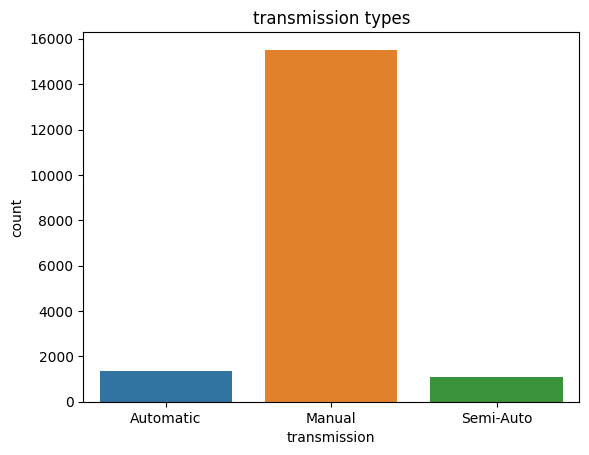

In [10]:
sns.countplot(x="transmission",data=ca)
plt.title("transmission types")
plt.show()

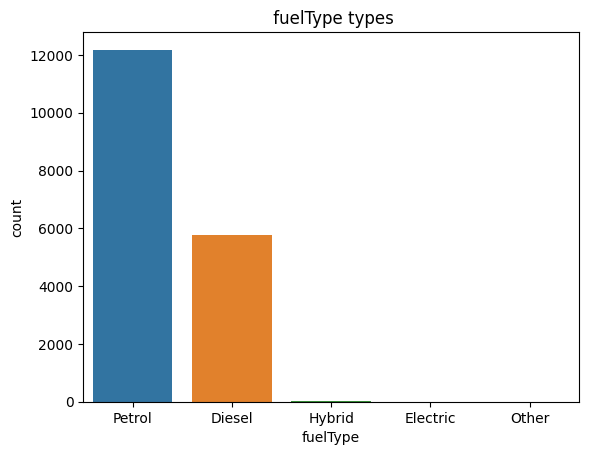

In [13]:
sns.countplot(x="fuelType",data=ca)
plt.title(" fuelType types")
plt.show()

In [14]:
print(ca["model"].value_counts())
print("\n\n")
print(ca["transmission"].value_counts())
print("\n\n")
print(ca["fuelType"].value_counts())

 Fiesta                   6557
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Focus                        1
Name: model, dtype: int64



Manual       15518
Automatic     1361
Semi-Auto     1087
Name: transmission, dtype: int64



Petrol      12179
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: fuelType, dtype: int64


<Axes: title={'center': 'Correlation between year and price'}, xlabel='price', ylabel='year'>

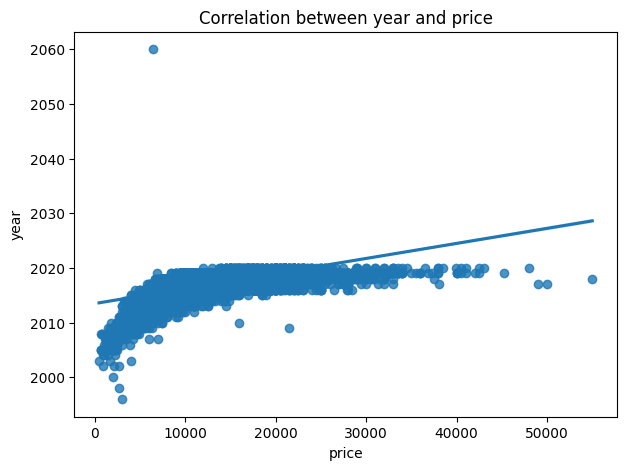

In [50]:
fig = plt.figure(figsize=(7,5))
plt.title('Correlation between year and price')
sns.regplot(x='price', y='year', data=ca)

In [16]:
ca["fuelType"].unique()

array(['Petrol', 'Diesel', 'Hybrid', 'Electric', 'Other'], dtype=object)

In [15]:
ca["transmission"].unique()

array(['Automatic', 'Manual', 'Semi-Auto'], dtype=object)

In [24]:
ca.replace({"transmission":{'Automatic':0,'Manual':1,'Semi-Auto':2}},inplace=True)
ca.replace({"fuelType":{'Petrol':0,'Diesel':1,'Hybrid':2,'Electric':3,'Other':4}},inplace=True)
ca.drop("model",axis=1,inplace=True)

In [22]:
ca.head()

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,2017,12000,0,15944,0,150,57.7,1.0
1,2018,14000,1,9083,0,150,57.7,1.0
2,2017,13000,1,12456,0,150,57.7,1.0
3,2019,17500,1,10460,0,145,40.3,1.5
4,2019,16500,0,1482,0,145,48.7,1.0


In [26]:
x=ca.drop("price",axis=1)
y=ca["price"]

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print("Shape of X_train is: ", x_train.shape)
print("Shape of y_train is: ", y_train.shape)
print("Shape of X_test is: ", x_test.shape)
print("Shape of y_test is: ", y_test.shape)

Shape of X_train is:  (12576, 7)
Shape of y_train is:  (12576,)
Shape of X_test is:  (5390, 7)
Shape of y_test is:  (5390,)


In [28]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [32]:
Linear=LinearRegression()
Linear.fit(x_train,y_train)
pred_Linear=Linear.predict(x_test)

In [36]:
linreg_mae = mean_absolute_error(y_test, pred_Linear)
linreg_r2 = r2_score(y_test, pred_Linear)
print("MAE of linear regression model is:", linreg_mae)
print("R2 score of linear regression model is:", linreg_r2)

MAE of linear regression model is: 1771.9102043298026
R2 score of linear regression model is: 0.7300210047495993


In [37]:
DecisionTree=DecisionTreeRegressor()
DecisionTree.fit(x_train,y_train)
pred_DecisionTree=DecisionTree.predict(x_test)

In [39]:
dtree_mae = mean_absolute_error(y_test, pred_DecisionTree)
dtree_r2 = r2_score(y_test, pred_DecisionTree)
print("MAE of linear regression model is:", dtree_mae)
print("R2 score of linear regression model is:", dtree_r2)

MAE of linear regression model is: 1200.189393939394
R2 score of linear regression model is: 0.8542739294196484


In [40]:
xgb = XGBRegressor()
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)

In [41]:
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)
print("MAE of xgboost model is:", xgb_mae)
print("R2 score of xgboost model is:", xgb_r2)

MAE of xgboost model is: 910.0959941460604
R2 score of xgboost model is: 0.9167106377271254


In [42]:
linreg_score = cross_val_score(Linear, x_test, y_test, cv=4)
print("Linear Regression model accuracy is: {}".format(linreg_score.mean()*100))

Linear Regression model accuracy is: 72.8784003885547


In [43]:
dtree_score = cross_val_score(DecisionTree, x_test, y_test, cv=4)
print("Decision Tree model accuracy is: {}".format(dtree_score.mean()*100))

Decision Tree model accuracy is: 81.16852998083452


In [44]:
xgb_score = cross_val_score(xgb, x_test, y_test, cv=4)
print("Decision Tree model accuracy is: {}".format(xgb_score.mean()*100))

Decision Tree model accuracy is: 89.27856607086365
